# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [17]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [18]:
data1 <- read.csv("/kaggle/input/anova-abuthwahir/productivity_data_owa.csv")
data2 <- read.csv("/kaggle/input/anova-abuthwahir/productivity_data_twa.csv")

*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

In [20]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘e1071’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


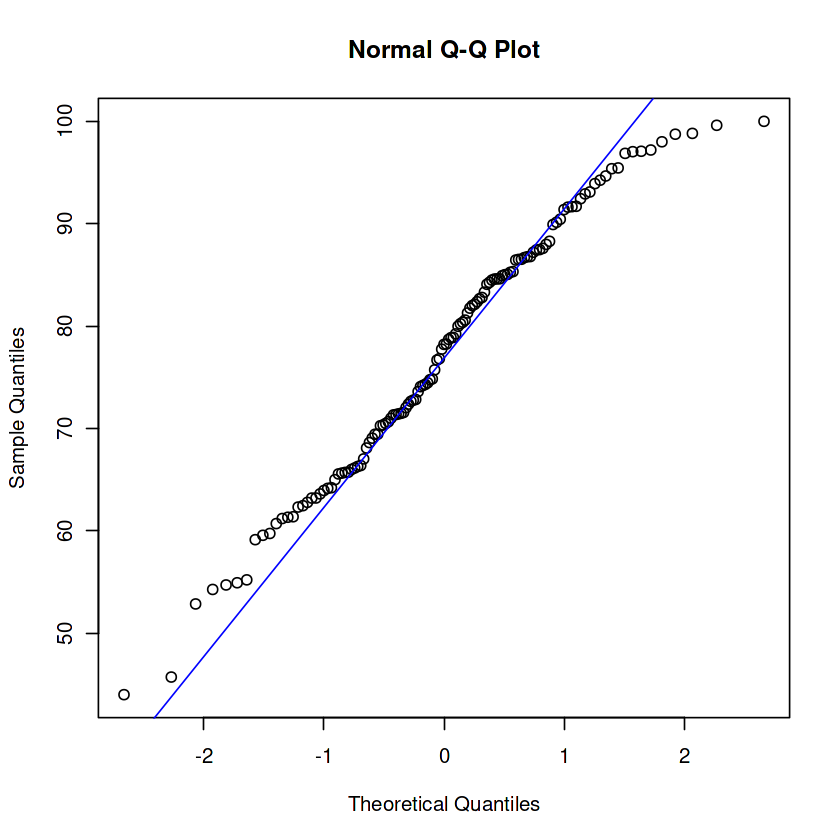

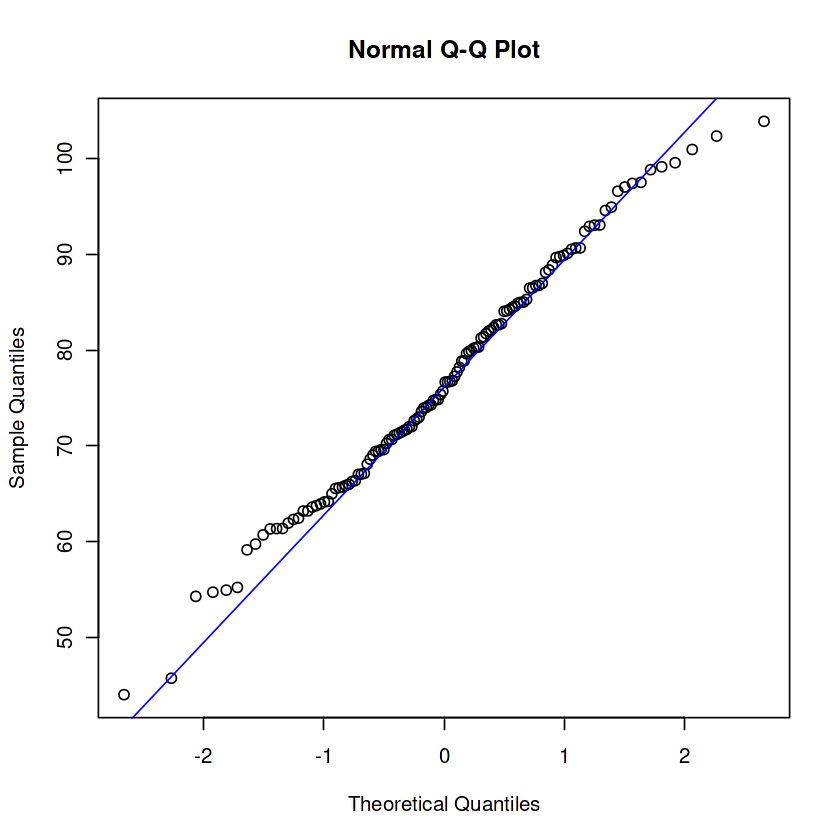

In [21]:
# Group 1: Work Setting d1
d1 <- data1[,3]
# Q-Q plot for d1
qqnorm(d1)
qqline(d1, col = "blue") 


# Group 2: Work Setting d2
d2 <- data2[,4]
# Q-Q plot for d2
qqnorm(d2)
qqline(d2, col = "blue") 

In [ ]:
If the points on the Q-Q plot for both d1 and d2 lie approximately along the reference line (qqline()), it suggests that the data is normally distributed.
If the points deviate significantly from the reference line, it indicates departures from normality.
If the points curve upwards or downwards away from the line, this may indicate positive or negative skewness, respectively.

*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


In [44]:
#Correct Approach is to Use Anova especially One Way  Anova 
#No, a t-test is not appropriate as there is more chances getting error than Anova... SEE MARKDOWN

data1 <- read.csv("/kaggle/input/anova-abuthwahir/productivity_data_owa.csv")
# Perform One-Way ANOVA
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data1)
# Display the summary of the ANOVA test
summary(anova_result)

#For DATA2
data2 <- read.csv("/kaggle/input/anova-abuthwahir/productivity_data_twa.csv")
anova_result2 <- aov(ProductivityScore ~ CommunicationTool, data = data2)
summary(anova_result2)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   Df Sum Sq Mean Sq F value Pr(>F)  
CommunicationTool   2    707   353.6   2.369 0.0977 .
Residuals         125  18657   149.3                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [35]:
#Using Xi square 
data1$ProductivityCategory <- cut(data1$ProductivityScore,
                                   breaks = c(-Inf, 50, 75, Inf),
                                   labels = c("Low", "Medium", "High"))
table_data1 <- table(data1$RemoteWorkSetting, data1$ProductivityCategory)
# Perform Chi-Square Test
chisq_result <- chisq.test(table_data)
chisq_result
#Data2
data2$ProductivityCategory <- cut(data2$ProductivityScore,
                                   breaks = c(-Inf, 50, 75, Inf),
                                   labels = c("Low", "Medium", "High"))
table_data2 <- table(data2$CommunicationTool, data2$ProductivityCategory)
chisq_result2 <- chisq.test(table_data2)
# Display the result
chisq_result2

Warning message in chisq.test(table_data):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_data
X-squared = 258, df = 256, p-value = 0.4532


Warning message in chisq.test(table_data2):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_data2
X-squared = 5.3796, df = 4, p-value = 0.2505


Correct Approach is to Use Anova especially One Way  Anova 
No, a t-test is not appropriate as there is more chances getting error than Anova ....
Especially using multiple t-tests would require adjusting for multiple comparisons, which can complicate the analysis and increase the likelihood of Type I errors.

*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [43]:
# Your answer here.
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data1)
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data1)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685



In [ ]:
#These pairs show a clear difference in productivity, with p-values less than both significance levels (0.05 and 0.02), indicating that the differences in productivity scores between these tools are statistically significant.

#For 0.05 significalnce level we can say it is statisticallt significase since the confidence level is 95% for for the 0.02% significance evel we will have to reject teh null hypothesis

These pairs show a clear difference in productivity, with p-values less than both significance levels (0.05 and 0.02), indicating that the differences in productivity scores between these tools are statistically significant.

For 0.05 significalnce level we can say it is statisticallt significase since the confidence level is 95% for for the 0.02% significance evel we will have to reject teh null hypothesis

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [45]:
# Load the dataset
data2 <- read.csv("/kaggle/input/anova-ws-c/productivity_data_twa.csv")

# Perform Two-Way ANOVA
anova_result2 <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data2)

# Display the summary of the ANOVA test
summary(anova_result2)   #Check Markdown

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Interaction Effect:::
The interaction between different work settings and communication tools does not significantly affect employee productivity scores at the 0.05 significance level (p-value = 0.1454). This suggests that the impact of work settings on productivity is not significantly influenced by the choice of communication tool, and similarly, the impact of communication tools on productivity is not significantly influenced by the work setting.

Main Effects:::
Work Setting: Significantly affects productivity scores.
Communication Tool: Shows marginal significance (considering the 0.1 level), but not significant at the 0.05 level.

In [46]:

# Load necessary library
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
library(tidyverse)
#2-way 
data <- read.csv("/kaggle/input/anova-abuthwahir/productivity_data_twa.csv", header=TRUE)
head(data)
str(data)

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


'data.frame':	128 obs. of  4 variables:
 $ employee_no      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ RemoteWorkSetting: chr  "Hybrid" "Coworking space" "Hybrid" "Hybrid" ...
 $ CommunicationTool: chr  "Zoom" "Zoom" "Email" "Slack" ...
 $ ProductivityScore: num  93.1 98.9 81.4 80.3 64.2 ...


In [47]:
# Perform Two-Way ANOVA
anova_result2 <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data)
summary(anova_result2)


                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


In [52]:

    
# As an Entrepreneur:I would adopt based on Significant Factors

 #I would adopt the Best Strategy , If our data indicates that a particular work setting and communication tool combination maximizes productivity, it's logical to adopt that combination for our company to enhance overall efficiency and employee satisfaction.
# Contextual Considerations: Consider the specific needs of my company, such as flexibility, employee preferences, and operational requirements. Use the study's results as a starting point but tailor the strategy to fit our company's context.

# COmpany name doesn't Matter though i would give "Info-Ind-Tech"

#From the above statistics i would say the work setting or the communication tool doesnt matter and I would prefer the employees to work according to their choice 

ERROR: Error in parse(text = x, srcfile = src): <text>:4:5: unexpected symbol
3:     
4:  As an
       ^


As an Entrepreneur:I would adopt based on Significant Factors

I would adopt the Best Strategy , If our data indicates that a particular work setting and communication tool combination maximizes productivity, it's logical to adopt that combination for our company to enhance overall efficiency and employee satisfaction.
Contextual Considerations: Consider the specific needs of my company, such as flexibility, employee preferences, and operational requirements. Use the study's results as a starting point but tailor the strategy to fit our company's context.

COmpany name doesn't Matter though i would give "Info-Ind-Tech"

From the above statistics i would say the work setting or the communication tool doesnt matter and I would prefer the employees to work according to their choice 